In [1]:
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from pprint import pprint

Ejercicio 8.3.1. Realice una gráfica con las curvas de cos x y sin x entre 0 y 10 con 50 puntos. La
primera debe ser en color azul con línea continua y la segunda color rojo y con rayas discontinuas.
Etiquete la figura como ‘Funciones trigonométricas’ y con la leyenda correspondiente (‘cos x’, ‘sin
x’) para las dos curvas.

In [2]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

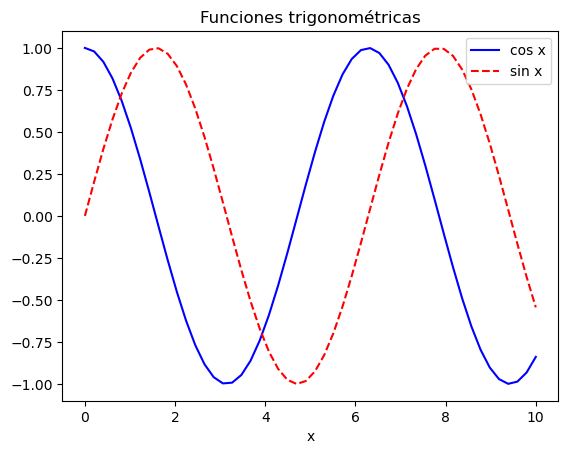

In [3]:
ang = linspace(0, 10, 50)

plt.plot(ang,cos(ang),'b-', label='cos x')
plt.plot(ang,sin(ang),'r--', label='sin x')

plt.xlabel('x')
plt.title('Funciones trigonométricas')

# Location Strings:
#   best
#   upper right
#   upper left
#   lower left
#   lower right
#   right
#   center left
#   center right
#   lower center
#   upper center
#   center
plt.legend(loc='upper right')

Ejercicio 8.3.2. Diseñe una función denominada funplot() que dibuje una función de un parámetro
f entre dos abscisas, xmin, xmax usando en total np puntos. También se le debe pasar el tipo de
línea y la leyenda (que no dibujará si no se proporciona).

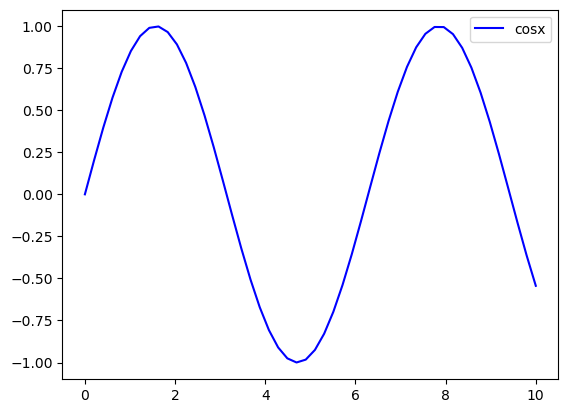

In [4]:
def funplot (f, xmin, xmax, np, line, legend=None):
    x = linspace(xmin, xmax, np)
    plt.plot(x,f(x),line,label=legend)
    if legend is not None:
        plt.legend()

def fun(x):
    return sin(x)
    
funplot(fun, 0, 10, 50, 'b', 'cosx')

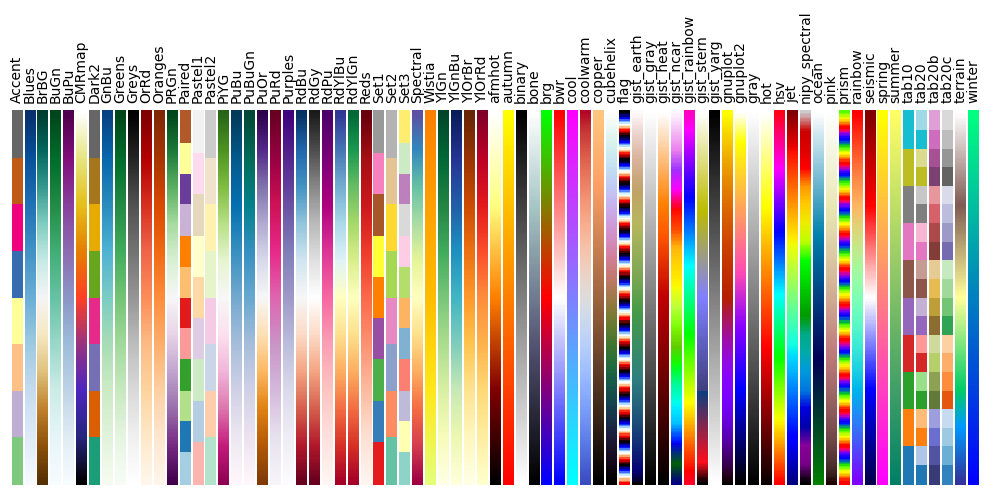

In [5]:
# Ver: https://scipy-lectures.org/intro/matplotlib/auto_examples/options/plot_colormaps.html

import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=False)
a = np.outer(np.arange(0, 1, 0.01), np.ones(10))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=0.8, bottom=0.05, left=0.01, right=0.99)
maps = [m for m in plt.cm.datad if not m.endswith("_r")]
maps.sort()
l = len(maps) + 1

for i, m in enumerate(maps):
    plt.subplot(1, l, i+1)
    plt.axis("off")
    plt.imshow(a, aspect='auto', cmap=plt.get_cmap(m), origin="lower")
    plt.title(m, rotation=90, fontsize=10, va='bottom')

plt.show()


# https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html

# https://matplotlib.org/stable/users/explain/colors/colormaps.html

# https://www.fieldtriptoolbox.org/faq/colormap/

# https://blog.csdn.net/MizarTian/article/details/88664412

# https://foundations.projectpythia.org/_images/sequential.png

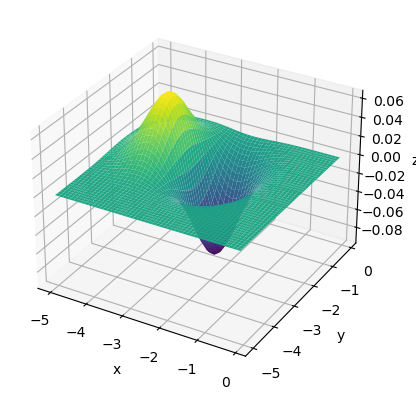

In [6]:
# Creamos un mayado homogéneo en el plano XY (forma alternativa)
xv = yv = arange(-5, 0, 0.1)
x, y = meshgrid(xv, yv);
# Calculamos las coordenada de la superficie
# en cada uno de los puntos (x,y)
z = 0.2*sin(x)*exp(-(x+3)**2)*exp(-(y+2)**2)
# Creamos la figura y los ejes 3D
fig = plt.figure()
# Ver: https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html
ax = fig.add_subplot(111, projection='3d')
# Pintamos la superficie
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.viridis)
# Etiquetamos los ejes
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
# Mostramos la figura
plt.show()

In [98]:
x = linspace(0, 2, 3)
pprint(x)
y = linspace(3, 6, 4)
pprint(y)
X, Y = meshgrid(x, y)
pprint(X)
pprint(Y)
Z = cos(X ** 2 + Y ** 2)
pprint(Z)

array([0., 1., 2.])
array([3., 4., 5., 6.])
array([[0., 1., 2.],
       [0., 1., 2.],
       [0., 1., 2.],
       [0., 1., 2.]])
array([[3., 3., 3.],
       [4., 4., 4.],
       [5., 5., 5.],
       [6., 6., 6.]])
array([[-0.91113026, -0.83907153,  0.90744678],
       [-0.95765948, -0.27516334,  0.40808206],
       [ 0.99120281,  0.64691932, -0.74805753],
       [-0.12796369,  0.76541405, -0.66693806]])


In [7]:
fd = open('cargas.txt', 'r')
lines = fd.readlines()
fd.close()
pprint(lines)

['#Distribución de cargas puntuales\n',
 '#Q(microC)  x(m) y(m) z(m)\n',
 ' 15.0       0    0    0\n',
 ' 25.0       0    2    0\n',
 '-15.0       2    0    0\n',
 '-25.0       2    2    0\n']


In [8]:
with open('cargas.txt', 'r') as fd:
    lines = fd.readlines()
pprint(lines)

['#Distribución de cargas puntuales\n',
 '#Q(microC)  x(m) y(m) z(m)\n',
 ' 15.0       0    0    0\n',
 ' 25.0       0    2    0\n',
 '-15.0       2    0    0\n',
 '-25.0       2    2    0\n']


In [9]:
with open('cargas.txt', 'r') as fd:
    while True:
        line = fd.readline()
        if not line:
            break
        pprint(line)


'#Distribución de cargas puntuales\n'
'#Q(microC)  x(m) y(m) z(m)\n'
' 15.0       0    0    0\n'
' 25.0       0    2    0\n'
'-15.0       2    0    0\n'
'-25.0       2    2    0\n'


In [10]:
q, x, y, z = [], [], [], []

with open('cargas.txt', 'r') as fd:
    while line := fd.readline():
        if line[0] == '#':
            continue
        #pprint(line.split())
        qn, xn, yn, zn = line.split()
        q.append(float(qn))
        x.append(float(xn))
        y.append(float(yn))
        z.append(float(zn))

data = array([q, x, y, z])

pprint(data)

array([[ 15.,  25., -15., -25.],
       [  0.,   0.,   2.,   2.],
       [  0.,   2.,   0.,   2.],
       [  0.,   0.,   0.,   0.]])


In [11]:
mierda = array([ 1.0, 0.0, 0.0, 0.0 ]).reshape(4, 1)
pprint(mierda)

array([[1.],
       [0.],
       [0.],
       [0.]])


In [12]:
def distancia(columna):
    pprint(columna)
    #v = columna[:,:]
    return 1

apply_along_axis(distancia, 0, data)


array([15.,  0.,  0.,  0.])
array([25.,  0.,  2.,  0.])
array([-15.,   2.,   0.,   0.])
array([-25.,   2.,   2.,   0.])


array([1, 1, 1, 1])

In [13]:
q, x, y, z = [], [], [], []

with open('cargas.txt', 'r') as fd:
    while line := fd.readline():
        if line[0] == '#':
            continue
        #pprint(line.split())
        qn, xn, yn, zn = line.split()
        q.append(float(qn))
        x.append(float(xn))
        y.append(float(yn))
        z.append(float(zn))

q = array(q)
x = array(x)
y = array(y)
z = array(z)

pprint([q,x,y,z])

[array([ 15.,  25., -15., -25.]),
 array([0., 0., 2., 2.]),
 array([0., 2., 0., 2.]),
 array([0., 0., 0., 0.])]


In [14]:
q_mierda = 1.0
x_mierda = 1
y_mierda = 0
z_mierda = 0

Calcúlese el potencial eléctrico

In [15]:
d2 = (x - x_mierda)**2 + (y - y_mierda)**2 + (z - z_mierda)**2
pprint(d2)

array([1., 5., 1., 5.])


In [16]:
d = sqrt(d2)
pprint(d)

array([1.        , 2.23606798, 1.        , 2.23606798])


In [17]:
V = 9e9 * q / 1e6 / d
pprint(V)

array([ 135000.        ,  100623.05898749, -135000.        ,
       -100623.05898749])


campo eléctrico

In [18]:
# Vector normal
U = array([x_mierda - x, y_mierda - y, z_mierda - z]) / d
pprint(U)

array([[ 1.        ,  0.4472136 , -1.        , -0.4472136 ],
       [ 0.        , -0.89442719,  0.        , -0.89442719],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])


In [19]:
E = 9e9 * q / 1e6 / d2 * U
pprint(E)

array([[135000.       ,  20124.6117975, 135000.       ,  20124.6117975],
       [     0.       , -40249.223595 ,     -0.       ,  40249.223595 ],
       [     0.       ,      0.       ,     -0.       ,     -0.       ]])


In [20]:
E = V / d * U
pprint(E)

array([[135000.       ,  20124.6117975, 135000.       ,  20124.6117975],
       [     0.       , -40249.223595 ,     -0.       ,  40249.223595 ],
       [     0.       ,      0.       ,     -0.       ,     -0.       ]])


In [21]:
E[:,0]

array([135000.,      0.,      0.])

fuerza debida a cada una de las cargas

In [22]:
E * q_mierda

array([[135000.       ,  20124.6117975, 135000.       ,  20124.6117975],
       [     0.       , -40249.223595 ,     -0.       ,  40249.223595 ],
       [     0.       ,      0.       ,     -0.       ,     -0.       ]])

In [23]:
sum(E * q_mierda, axis=1)

array([310249.223595,      0.      ,      0.      ])

In [24]:
Efinal = E.T
pprint(Efinal)

array([[135000.       ,      0.       ,      0.       ],
       [ 20124.6117975, -40249.223595 ,      0.       ],
       [135000.       ,     -0.       ,     -0.       ],
       [ 20124.6117975,  40249.223595 ,     -0.       ]])


In [25]:
Efinal = swapaxes(E, 0, 1)
pprint(Efinal)

array([[135000.       ,      0.       ,      0.       ],
       [ 20124.6117975, -40249.223595 ,      0.       ],
       [135000.       ,     -0.       ,     -0.       ],
       [ 20124.6117975,  40249.223595 ,     -0.       ]])


In [26]:
q, x, y, z = [], [], [], []

with open('cargas.txt', 'r') as fd:
    while line := fd.readline():
        if line[0] == '#':
            continue
        #pprint(line.split())
        qn, xn, yn, zn = line.split()
        q.append(float(qn))
        x.append(float(xn))
        y.append(float(yn))
        z.append(float(zn))

q = array(q).reshape(-1,1)
x = array(x).reshape(-1,1)
y = array(y).reshape(-1,1)
z = array(z).reshape(-1,1)

pprint([q,x,y,z])

[array([[ 15.],
       [ 25.],
       [-15.],
       [-25.]]),
 array([[0.],
       [0.],
       [2.],
       [2.]]),
 array([[0.],
       [2.],
       [0.],
       [2.]]),
 array([[0.],
       [0.],
       [0.],
       [0.]])]


In [27]:
q_mierda = 10.0
x_mierda = 10.0
y_mierda = 10.0
z_mierda = 10.0

In [28]:
d2 = (x - x_mierda)**2 + (y - y_mierda)**2 + (z - z_mierda)**2
pprint(d2)

array([[300.],
       [264.],
       [264.],
       [228.]])


In [29]:
d = sqrt(d2)
pprint(d)

array([[17.32050808],
       [16.24807681],
       [16.24807681],
       [15.09966887]])


In [30]:
V = 9e9 * q / 1e6 / d
pprint(V)

array([[  7794.22863406],
       [ 13847.79273517],
       [ -8308.6756411 ],
       [-14900.98901698]])


In [31]:
x.reshape(-1)

array([0., 0., 2., 2.])

In [32]:
# Vector normal
U = concatenate([ x_mierda - x, y_mierda - y, z_mierda - z ], axis=1) / d
pprint(U)

array([[0.57735027, 0.57735027, 0.57735027],
       [0.61545745, 0.49236596, 0.61545745],
       [0.49236596, 0.61545745, 0.61545745],
       [0.52981294, 0.52981294, 0.66226618]])


In [33]:
E = V / d * U
pprint(E)

array([[ 259.80762114,  259.80762114,  259.80762114],
       [ 524.53760361,  419.63008288,  524.53760361],
       [-251.77804973, -314.72256216, -314.72256216],
       [-522.84171989, -522.84171989, -653.55214987]])


In [34]:
F = E * q_mierda
pprint(F)

array([[ 2598.07621135,  2598.07621135,  2598.07621135],
       [ 5245.37603605,  4196.30082884,  5245.37603605],
       [-2517.7804973 , -3147.22562163, -3147.22562163],
       [-5228.41719894, -5228.41719894, -6535.52149868]])


In [35]:
Et = sum(E, axis=0)
pprint(Et)

array([   9.72545512, -158.12657804, -183.92948729])


In [36]:
Ft = sum(F, axis=0)
pprint(Ft)

array([   97.25455116, -1581.26578038, -1839.2948729 ])


In [37]:
print("q(microC)\tPotencial(V)\tFx(N)\t\tFy(N)\t\tFz(N)\tEx(N/C)\tEy(N/C)\tEz(N/C)")
for _q, _v, _f, _e in zip(q, V, F, E):
    print("%5.1f %10.2e %10.2e %10.2e %10.2e %10.2e %10.2e %10.2e" % \
          (_q, _v, _f[0], _f[1], _f[2], _e[0], _e[1], _e[2]))

q(microC)	Potencial(V)	Fx(N)		Fy(N)		Fz(N)	Ex(N/C)	Ey(N/C)	Ez(N/C)
 15.0   7.79e+03   2.60e+03   2.60e+03   2.60e+03   2.60e+02   2.60e+02   2.60e+02
 25.0   1.38e+04   5.25e+03   4.20e+03   5.25e+03   5.25e+02   4.20e+02   5.25e+02
-15.0  -8.31e+03  -2.52e+03  -3.15e+03  -3.15e+03  -2.52e+02  -3.15e+02  -3.15e+02
-25.0  -1.49e+04  -5.23e+03  -5.23e+03  -6.54e+03  -5.23e+02  -5.23e+02  -6.54e+02


In [38]:
print("Potencial(V)\tFx(N)\t\tFy(N)\t\tFz(N)\tEx(N/C)\tEy(N/C)\tEz(N/C)")
print("%10.2e %10.2e %10.2e %10.2e %10.2e %10.2e %10.2e" % \
    (sum(V), Ft[0], Ft[1], Ft[2], Et[0], Et[1], Et[2]))

Potencial(V)	Fx(N)		Fy(N)		Fz(N)	Ex(N/C)	Ey(N/C)	Ez(N/C)
 -1.57e+03   9.73e+01  -1.58e+03  -1.84e+03   9.73e+00  -1.58e+02  -1.84e+02


Se pide representar:

    En una misma gráfica el potencial eléctrico a lo largo de la línea horizontal y=1 (desde x=-10 hasta x=12) y de la línea vertical x=1 (desde y=-10 hasta y=12).  Debe estar adecuadamente titulada, con rejilla, sus ejes adecuadamente ilustrados y una leyenda.
    Las superficies equipotenciales en el cuadrado de vértices (0.1,0.1) y (1.9,1.9)

In [61]:
q, x, y = [], [], []

with open('cargas2.txt', 'r') as fd:
    while line := fd.readline():
        if line[0] == '#':
            continue
        #pprint(line.split())
        qn, xn, yn = line.split()
        q.append(float(qn))
        x.append(float(xn))
        y.append(float(yn))

data_q = array(q).reshape(-1,1)
data_x = array(x).reshape(-1,1)
data_y = array(y).reshape(-1,1)

pprint([data_q, data_x, data_y])

[array([[ 15.],
       [ 25.],
       [-15.],
       [-25.]]),
 array([[0.],
       [0.],
       [2.],
       [2.]]),
 array([[0.],
       [2.],
       [0.],
       [2.]])]


In [62]:
y_a = 1
x_a = linspace(-10, 12, 230)
pprint(x_a)


array([-1.00000000e+01, -9.90393013e+00, -9.80786026e+00, -9.71179039e+00,
       -9.61572052e+00, -9.51965066e+00, -9.42358079e+00, -9.32751092e+00,
       -9.23144105e+00, -9.13537118e+00, -9.03930131e+00, -8.94323144e+00,
       -8.84716157e+00, -8.75109170e+00, -8.65502183e+00, -8.55895197e+00,
       -8.46288210e+00, -8.36681223e+00, -8.27074236e+00, -8.17467249e+00,
       -8.07860262e+00, -7.98253275e+00, -7.88646288e+00, -7.79039301e+00,
       -7.69432314e+00, -7.59825328e+00, -7.50218341e+00, -7.40611354e+00,
       -7.31004367e+00, -7.21397380e+00, -7.11790393e+00, -7.02183406e+00,
       -6.92576419e+00, -6.82969432e+00, -6.73362445e+00, -6.63755459e+00,
       -6.54148472e+00, -6.44541485e+00, -6.34934498e+00, -6.25327511e+00,
       -6.15720524e+00, -6.06113537e+00, -5.96506550e+00, -5.86899563e+00,
       -5.77292576e+00, -5.67685590e+00, -5.58078603e+00, -5.48471616e+00,
       -5.38864629e+00, -5.29257642e+00, -5.19650655e+00, -5.10043668e+00,
       -5.00436681e+00, -

In [63]:
d2 = (data_x - x_a)**2 + (data_y - y_a)**2
pprint(d2)

array([[101.        ,  99.08783204,  97.19412292,  95.31887264,
         93.4620812 ,  91.62374859,  89.80387483,  88.00245991,
         86.21950382,  84.45500658,  82.70896817,  80.98138861,
         79.27226788,  77.581606  ,  75.90940295,  74.25565874,
         72.62037337,  71.00354684,  69.40517915,  67.8252703 ,
         66.26382029,  64.72082912,  63.19629679,  61.6902233 ,
         60.20260865,  58.73345283,  57.28275586,  55.85051772,
         54.43673843,  53.04141797,  51.66455636,  50.30615358,
         48.96620965,  47.64472455,  46.34169829,  45.05713087,
         43.79102229,  42.54337255,  41.31418165,  40.10344959,
         38.91117637,  37.73736199,  36.58200645,  35.44510974,
         34.32667188,  33.22669285,  32.14517267,  31.08211133,
         30.03750882,  29.01136515,  28.00368033,  27.01445434,
         26.04368719,  25.09137888,  24.15752941,  23.24213878,
         22.34520699,  21.46673404,  20.60671993,  19.76516466,
         18.94206823,  18.13743064,  17.

In [64]:
d = sqrt(d2)
pprint(d)

array([[10.04987562,  9.95428712,  9.85870797,  9.76313846,  9.66757887,
         9.57202949,  9.47649064,  9.38096263,  9.28544581,  9.18994051,
         9.09444711,  8.99896597,  8.90349751,  8.80804212,  8.71260024,
         8.61717232,  8.52175882,  8.42636024,  8.33097708,  8.23560989,
         8.14025923,  8.04492568,  7.94960985,  7.8543124 ,  7.759034  ,
         7.66377536,  7.56853723,  7.47332039,  7.37812567,  7.28295393,
         7.18780609,  7.0926831 ,  6.99758599,  6.90251581,  6.80747371,
         6.71246087,  6.61747854,  6.52252808,  6.42761088,  6.33272845,
         6.23788236,  6.14307431,  6.04830608,  5.95357957,  5.85889681,
         5.76425996,  5.6696713 ,  5.5751333 ,  5.48064858,  5.38621993,
         5.29185037,  5.19754311,  5.1033016 ,  5.00912955,  4.91503097,
         4.82101014,  4.72707171,  4.6332207 ,  4.53946252,  4.44580304,
         4.35224864,  4.25880625,  4.16548339,  4.0722883 ,  3.97922994,
         3.88631814,  3.79356366,  3.70097834,  3.6

In [65]:
V_a = 9e9 * data_q / 1e6 / d
pprint(V_a)

array([[  13433.00206783,   13561.99579049,   13693.47792371,
          13827.52078326,   13964.19949853,   14103.59214985,
          14245.77991399,   14390.84721819,   14538.88190346,
          14689.97539776,   14844.2228998 ,   15001.72357405,
          15162.58075803,   15326.90218259,   15494.80020613,
          15666.39206392,   15841.80013361,   16021.15221798,
          16204.5818466 ,   16392.2285975 ,   16584.23844065,
          16780.76410492,   16981.96547029,   17188.0099875 ,
          17399.07312731,   17615.33886169,   17837.00017986,
          18064.25964185,   18297.32997295,   18536.43470245,
          18781.80885062,   19033.69966809,   19292.36743232,
          19558.08630635,   19831.14526538,   20111.84909753,
          20400.5194856 ,   20697.49617755,   21003.13825403,
          21317.82550242,   21641.95990765,   21975.96727149,
          22320.29897291,   22675.43388394,   23041.88045673,
          23420.17899974,   23810.90416257,   24214.66765166,
        

In [66]:
Vt_a = sum(V_a, axis=0)
pprint(Vt_a)

array([   5924.96610021,    6029.35672494,    6136.52572646,
          6246.57238228,    6359.6004338 ,    6475.71832869,
          6595.03947879,    6717.68253447,    6843.7716769 ,
          6973.43692937,    7106.81448927,    7244.04708211,
          7385.28433945,    7530.68320241,    7680.40835298,
          7834.63267503,    7993.5377477 ,    8157.31437349,
          8326.16314408,    8500.29504675,    8679.93211503,
          8865.30812697,    9056.66935532,    9254.27537378,
          9458.39992442,    9669.33185126,    9887.37610617,
         10112.85483316,   10346.10853833,   10587.49735311,
         10837.40239936,   11096.22726573,   11364.39960563,
         11642.37286843,   11930.62817636,   12229.67636144,
         12540.06017778,   12862.35670672,   13197.17997392,
         13545.18379973,   13907.06490672,   14283.56631062,
         14675.48102439,   15083.65610823,   15508.9971023 ,
         15952.47288343,   16415.12099175,   16898.05347903,
         17402.46333646,

In [67]:
x_b = 1
y_b = linspace(-10, 12, 230)
pprint(y_b)


array([-1.00000000e+01, -9.90393013e+00, -9.80786026e+00, -9.71179039e+00,
       -9.61572052e+00, -9.51965066e+00, -9.42358079e+00, -9.32751092e+00,
       -9.23144105e+00, -9.13537118e+00, -9.03930131e+00, -8.94323144e+00,
       -8.84716157e+00, -8.75109170e+00, -8.65502183e+00, -8.55895197e+00,
       -8.46288210e+00, -8.36681223e+00, -8.27074236e+00, -8.17467249e+00,
       -8.07860262e+00, -7.98253275e+00, -7.88646288e+00, -7.79039301e+00,
       -7.69432314e+00, -7.59825328e+00, -7.50218341e+00, -7.40611354e+00,
       -7.31004367e+00, -7.21397380e+00, -7.11790393e+00, -7.02183406e+00,
       -6.92576419e+00, -6.82969432e+00, -6.73362445e+00, -6.63755459e+00,
       -6.54148472e+00, -6.44541485e+00, -6.34934498e+00, -6.25327511e+00,
       -6.15720524e+00, -6.06113537e+00, -5.96506550e+00, -5.86899563e+00,
       -5.77292576e+00, -5.67685590e+00, -5.58078603e+00, -5.48471616e+00,
       -5.38864629e+00, -5.29257642e+00, -5.19650655e+00, -5.10043668e+00,
       -5.00436681e+00, -

In [68]:
d2 = (data_x - x_b)**2 + (data_y - y_b)**2
pprint(d2)

array([[101.        ,  99.08783204,  97.19412292,  95.31887264,
         93.4620812 ,  91.62374859,  89.80387483,  88.00245991,
         86.21950382,  84.45500658,  82.70896817,  80.98138861,
         79.27226788,  77.581606  ,  75.90940295,  74.25565874,
         72.62037337,  71.00354684,  69.40517915,  67.8252703 ,
         66.26382029,  64.72082912,  63.19629679,  61.6902233 ,
         60.20260865,  58.73345283,  57.28275586,  55.85051772,
         54.43673843,  53.04141797,  51.66455636,  50.30615358,
         48.96620965,  47.64472455,  46.34169829,  45.05713087,
         43.79102229,  42.54337255,  41.31418165,  40.10344959,
         38.91117637,  37.73736199,  36.58200645,  35.44510974,
         34.32667188,  33.22669285,  32.14517267,  31.08211133,
         30.03750882,  29.01136515,  28.00368033,  27.01445434,
         26.04368719,  25.09137888,  24.15752941,  23.24213878,
         22.34520699,  21.46673404,  20.60671993,  19.76516466,
         18.94206823,  18.13743064,  17.

In [69]:
d = sqrt(d2)
pprint(d)

array([[10.04987562,  9.95428712,  9.85870797,  9.76313846,  9.66757887,
         9.57202949,  9.47649064,  9.38096263,  9.28544581,  9.18994051,
         9.09444711,  8.99896597,  8.90349751,  8.80804212,  8.71260024,
         8.61717232,  8.52175882,  8.42636024,  8.33097708,  8.23560989,
         8.14025923,  8.04492568,  7.94960985,  7.8543124 ,  7.759034  ,
         7.66377536,  7.56853723,  7.47332039,  7.37812567,  7.28295393,
         7.18780609,  7.0926831 ,  6.99758599,  6.90251581,  6.80747371,
         6.71246087,  6.61747854,  6.52252808,  6.42761088,  6.33272845,
         6.23788236,  6.14307431,  6.04830608,  5.95357957,  5.85889681,
         5.76425996,  5.6696713 ,  5.5751333 ,  5.48064858,  5.38621993,
         5.29185037,  5.19754311,  5.1033016 ,  5.00912955,  4.91503097,
         4.82101014,  4.72707171,  4.6332207 ,  4.53946252,  4.44580304,
         4.35224864,  4.25880625,  4.16548339,  4.0722883 ,  3.97922994,
         3.88631814,  3.79356366,  3.70097834,  3.6

In [70]:
V_b = 9e9 * data_q / 1e6 / d
pprint(V_b)

array([[  13433.00206783,   13561.99579049,   13693.47792371,
          13827.52078326,   13964.19949853,   14103.59214985,
          14245.77991399,   14390.84721819,   14538.88190346,
          14689.97539776,   14844.2228998 ,   15001.72357405,
          15162.58075803,   15326.90218259,   15494.80020613,
          15666.39206392,   15841.80013361,   16021.15221798,
          16204.5818466 ,   16392.2285975 ,   16584.23844065,
          16780.76410492,   16981.96547029,   17188.0099875 ,
          17399.07312731,   17615.33886169,   17837.00017986,
          18064.25964185,   18297.32997295,   18536.43470245,
          18781.80885062,   19033.69966809,   19292.36743232,
          19558.08630635,   19831.14526538,   20111.84909753,
          20400.5194856 ,   20697.49617755,   21003.13825403,
          21317.82550242,   21641.95990765,   21975.96727149,
          22320.29897291,   22675.43388394,   23041.88045673,
          23420.17899974,   23810.90416257,   24214.66765166,
        

In [71]:
Vt_b = sum(V_b, axis=0)
pprint(Vt_b)

array([ 0.00000000e+00,  3.63797881e-12,  0.00000000e+00, -3.63797881e-12,
        0.00000000e+00, -3.63797881e-12, -3.63797881e-12,  0.00000000e+00,
        0.00000000e+00, -3.63797881e-12,  3.63797881e-12,  3.63797881e-12,
        3.63797881e-12,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -3.63797881e-12,  0.00000000e+00,  3.63797881e-12,  3.63797881e-12,
        0.00000000e+00,  0.00000000e+00, -3.63797881e-12,  0.00000000e+00,
        0.00000000e+00, -3.63797881e-12, -3.63797881e-12, -3.63797881e-12,
       -3.63797881e-12,  0.00000000e+00,  0.00000000e+00,  3.63797881e-12,
       -3.63797881e-12,  3.63797881e-12, -3.63797881e-12, -3.63797881e-12,
       -3.63797881e-12, -3.63797881e-12,  0.00000000e+00, -3.63797881e-12,
       -3.63797881e-12,  0.00000000e+00,  3.63797881e-12,  0.00000000e+00,
       -3.63797881e-12,  0.00000000e+00, -3.63797881e-12,  3.63797881e-12,
        0.00000000e+00,  0.00000000e+00, -3.63797881e-12, -3.63797881e-12,
        0.00000000e+00,  

Debe estar adecuadamente titulada, con rejilla, sus ejes adecuadamente ilustrados y una leyenda.

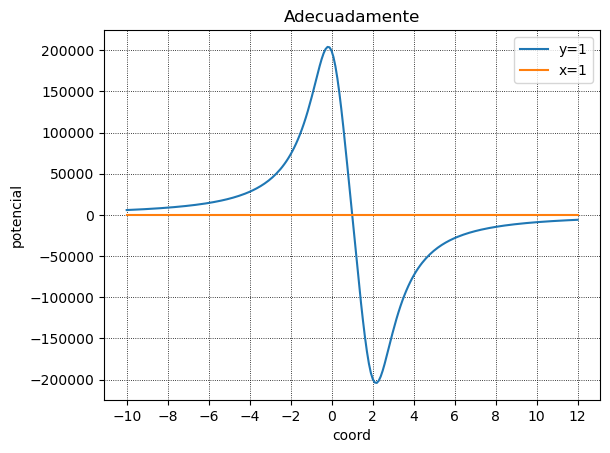

In [82]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(x_a,Vt_a, label="y=1")
plt.plot(y_b,Vt_b, label="x=1")
plt.title('Adecuadamente')
plt.xlabel('coord')
plt.ylabel('potencial')
plt.grid(color='k', linestyle=':', linewidth=0.6)
plt.legend()
ax.set_xticks(linspace(-10, 12, 12))
plt.show()

Las superficies equipotenciales en el cuadrado de vértices (0.1,0.1) y (1.9,1.9)

In [101]:
xx = linspace(0.1, 1.9, 19)
pprint(xx)
yy = linspace(0.1, 1.9, 19)
pprint(yy)
X, Y = np.meshgrid(xx, yy)
pprint(X.shape)
pprint(Y.shape)


array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9])
array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9])
(19, 19)
(19, 19)


In [107]:
d2 = (data_x.reshape(1,1,4) - X.reshape(19,19,1))**2 + (data_y.reshape(1,1,4) - Y.reshape(19,19,1))**2
pprint(d2)

array([[[0.02, 3.62, 3.62, 7.22],
        [0.05, 3.65, 3.25, 6.85],
        [0.1 , 3.7 , 2.9 , 6.5 ],
        ...,
        [2.9 , 6.5 , 0.1 , 3.7 ],
        [3.25, 6.85, 0.05, 3.65],
        [3.62, 7.22, 0.02, 3.62]],

       [[0.05, 3.25, 3.65, 6.85],
        [0.08, 3.28, 3.28, 6.48],
        [0.13, 3.33, 2.93, 6.13],
        ...,
        [2.93, 6.13, 0.13, 3.33],
        [3.28, 6.48, 0.08, 3.28],
        [3.65, 6.85, 0.05, 3.25]],

       [[0.1 , 2.9 , 3.7 , 6.5 ],
        [0.13, 2.93, 3.33, 6.13],
        [0.18, 2.98, 2.98, 5.78],
        ...,
        [2.98, 5.78, 0.18, 2.98],
        [3.33, 6.13, 0.13, 2.93],
        [3.7 , 6.5 , 0.1 , 2.9 ]],

       ...,

       [[2.9 , 0.1 , 6.5 , 3.7 ],
        [2.93, 0.13, 6.13, 3.33],
        [2.98, 0.18, 5.78, 2.98],
        ...,
        [5.78, 2.98, 2.98, 0.18],
        [6.13, 3.33, 2.93, 0.13],
        [6.5 , 3.7 , 2.9 , 0.1 ]],

       [[3.25, 0.05, 6.85, 3.65],
        [3.28, 0.08, 6.48, 3.28],
        [3.33, 0.13, 6.13, 2.93],
        .

In [108]:
d = sqrt(d2)
pprint(d)

array([[[0.14142136, 1.90262976, 1.90262976, 2.68700577],
        [0.2236068 , 1.91049732, 1.80277564, 2.61725047],
        [0.31622777, 1.92353841, 1.70293864, 2.54950976],
        ...,
        [1.70293864, 2.54950976, 0.31622777, 1.92353841],
        [1.80277564, 2.61725047, 0.2236068 , 1.91049732],
        [1.90262976, 2.68700577, 0.14142136, 1.90262976]],

       [[0.2236068 , 1.80277564, 1.91049732, 2.61725047],
        [0.28284271, 1.81107703, 1.81107703, 2.54558441],
        [0.36055513, 1.82482876, 1.71172428, 2.47588368],
        ...,
        [1.71172428, 2.47588368, 0.36055513, 1.82482876],
        [1.81107703, 2.54558441, 0.28284271, 1.81107703],
        [1.91049732, 2.61725047, 0.2236068 , 1.80277564]],

       [[0.31622777, 1.70293864, 1.92353841, 2.54950976],
        [0.36055513, 1.71172428, 1.82482876, 2.47588368],
        [0.42426407, 1.72626765, 1.72626765, 2.40416306],
        ...,
        [1.72626765, 2.40416306, 0.42426407, 1.72626765],
        [1.82482876, 2.475883

In [110]:
V = 9e9 * data_q.reshape(1,1,4) / 1e6 / d
pprint(V)

array([[[  954594.15460184,   118257.37452622,   -70954.42471573,
           -83736.32935104],
        [  603738.35392494,   117770.3825828 ,   -74884.52649041,
           -85968.08098885],
        [  426907.48412273,   116971.93010476,   -79274.72963448,
           -88252.26081218],
        ...,
        [   79274.72963448,    88252.26081218,  -426907.48412273,
          -116971.93010476],
        [   74884.52649041,    85968.08098885,  -603738.35392494,
          -117770.3825828 ],
        [   70954.42471573,    83736.32935104,  -954594.15460184,
          -118257.37452622]],

       [[  603738.35392494,   124807.54415068,   -70662.22954968,
           -85968.08098885],
        [  477297.07730092,   124235.4668342 ,   -74541.28010052,
           -88388.34764832],
        [  374422.63245203,   123299.24047902,   -78867.84210799,
           -90876.64406873],
        ...,
        [   78867.84210799,    90876.64406873,  -374422.63245203,
          -123299.24047902],
        [   74541.2801

In [113]:
Vtotal = sum(V, axis=2)
pprint(Vtotal)

array([[ 9.18160775e+05,  5.60656129e+05,  3.76352424e+05,
         2.68511714e+05,  1.96531460e+05,  1.43343819e+05,
         1.00764382e+05,  6.43528393e+04,  3.13961975e+04,
        -1.45519152e-11, -3.13961975e+04, -6.43528393e+04,
        -1.00764382e+05, -1.43343819e+05, -1.96531460e+05,
        -2.68511714e+05, -3.76352424e+05, -5.60656129e+05,
        -9.18160775e+05],
       [ 5.71915588e+05,  4.38602916e+05,  3.27977387e+05,
         2.46742949e+05,  1.85890274e+05,  1.37910712e+05,
         9.79638424e+04,  6.29623873e+04,  3.08235579e+04,
         1.45519152e-11, -3.08235579e+04, -6.29623873e+04,
        -9.79638424e+04, -1.37910712e+05, -1.85890274e+05,
        -2.46742949e+05, -3.27977387e+05, -4.38602916e+05,
        -5.71915588e+05],
       [ 4.00596615e+05,  3.41012848e+05,  2.76745989e+05,
         2.19525374e+05,  1.71002429e+05,  1.29598335e+05,
         9.33251768e+04,  6.04918344e+04,  2.97520126e+04,
         1.45519152e-11, -2.97520126e+04, -6.04918344e+04,
    